In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#!pip install textblob
#!pip install wordcloud
#!pip install pygal
#!pip install squarify

In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
import pygal as py
import squarify as sq
import matplotlib 
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline 

In [5]:
df=pd.read_csv("../Dataset/new_data.csv", encoding="ISO-8859-1") # heading = none

In [6]:
# MAP sentiment
label = {"positive": 2, "neutral": 1, "negative": 0}
df["sentiment"]=df["sentiment"].map(label)
y=df["sentiment"]
X=df["news"]

In [8]:
df.head()

,sentiment,news,news_len,word_count,length
0,1,According to Gran the company have no plan to ...,124,22,22
1,1,Technopolis plan to develop in stage an area o...,187,29,29
2,0,The international electronic industry company ...,225,33,33
3,2,With the new production plant the company woul...,205,32,32
4,2,According to the companyupdated strategy for t...,192,35,35


# Revised dataset

In [9]:
df['news_len'] = df['news'].astype(str).apply(len)
df['word_count'] = df['news'].apply(lambda x: len(str(x).split()))

In [10]:
df.head()

,sentiment,news,news_len,word_count,length
0,1,According to Gran the company have no plan to ...,118,22,22
1,1,Technopolis plan to develop in stage an area o...,173,29,29
2,0,The international electronic industry company ...,209,33,33
3,2,With the new production plant the company woul...,202,32,32
4,2,According to the companyupdated strategy for t...,179,33,35


 # POS

In [11]:
#create a file with each tweet
stringa=""
for i in df["news"]:
    stringa += i

In [12]:
token1 = nltk.word_tokenize(stringa) #tokenize text

In [13]:
token_1_tag=nltk.pos_tag(token1)

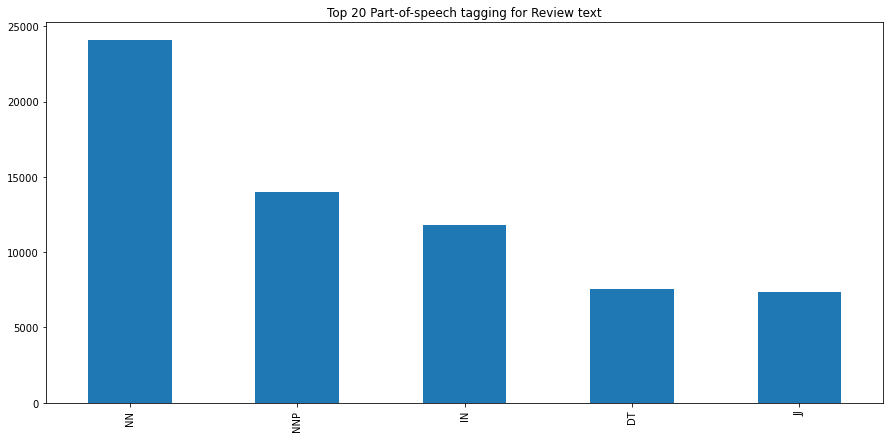

In [14]:
plt.figure(figsize=(15,7))
pos_df = pd.DataFrame(token_1_tag, columns= ["words", "pos"])
pos_df = pos_df.pos.value_counts()[:5]
pos_df.plot(
    kind='bar',
    title='Top 20 Part-of-speech tagging for Review text')
plt.show()    
    